# Prueba 2 

Erick Francisco Cadena Loza

## Pregunta_2 : Implementación del método de Gauss Seidel para resolver el sistema



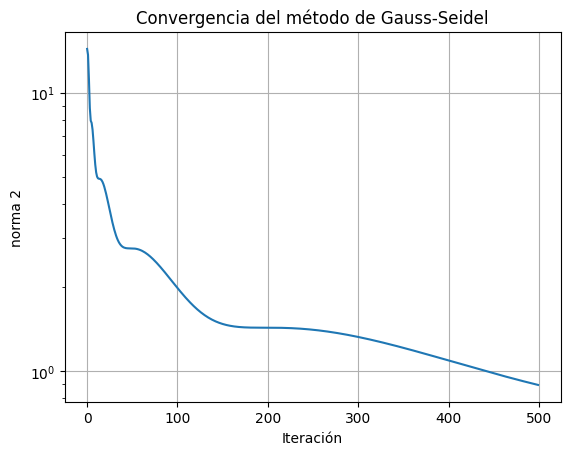

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hilbert_matrix(n):
    return np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

def gauss_seidel(A, b, max_iter=500, tol=1e-10):
    n = len(b)
    x = np.zeros_like(b)
    norm_history = []

    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - s1 - s2) / A[i, i]
        error = np.linalg.norm(x - x_old)
        norm_history.append(error)
        if error < tol:
            break

    return x, norm_history

# Sistema H_100 x = 1
n = 100
H = hilbert_matrix(n)
b = np.ones(n)

x_sol, normas = gauss_seidel(H, b)

# Gráfico de la evolución de la norma del error
plt.semilogy(normas)
plt.xlabel('Iteración')
plt.ylabel('norma')
plt.title('Convergencia del método de Gauss-Seidel')
plt.grid(True)
plt.show()

### Conclusiones

Se puede apreciar que a medidad van sucediendo las iteraciones la norma va decreciendo.

La matriz de hilbert es mal condicionada y aunque es simétrica definida positiva, el método de Gauss Seidel puede converger lentamente o incluso no converger para tamaños grandes como n = 100,debido a errores de redondeo

## Pregunta 3: Método de la Potencia y Potencia Inversa

In [21]:
def power_method(A, z0=None, tol=1e-10, nmax=500):
    n = A.shape[0]
    if z0 is None:
        z0 = np.random.rand(n)
    q = z0 / np.linalg.norm(z0)
    res = tol + 1
    sigma, err_list = [], []
    niter = 0

    while res >= tol and niter < nmax:
        niter += 1
        z = A @ q
        q = z / np.linalg.norm(z)
        λ = np.dot(q, A @ q)
        res = np.linalg.norm(A @ q - λ * q)
        sigma.append(λ)
        err_list.append(res)

    return sigma[-1], q, niter, err_list

def inv_power_method(A, z0=None, mu=0.0, tol=1e-10, nmax=500):
    n = A.shape[0]
    if z0 is None:
        z0 = np.random.rand(n)
    q = z0 / np.linalg.norm(z0)
    I = np.eye(n)
    M = A - mu * I
    sigma, err_list = [], []
    res = tol + 1
    niter = 0

    while res >= tol and niter < nmax:
        niter += 1
        z = np.linalg.solve(M, q)
        q = z / np.linalg.norm(z)
        z2 = A @ q
        λ = np.dot(q, z2)
        res = np.linalg.norm(z2 - λ * q)
        sigma.append(λ)
        err_list.append(res)

    return lambda: 1 / sigma[-1], q, niter, err_list


In [26]:
for n in [10, 30, 50, 70]:
    H = np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])
    lmax, _, it1, _ = power_method(H)
    lmin_inv, _, it2, _ = inv_power_method(H)
    cond_est = lmax * lmin_inv()
    print(f"Hilbert {n} => Condición estimada: {cond_est:.2e} | Iteraciones: PM={it1}, InvPM={it2}")

Hilbert 10 => Condición estimada: 1.58e+13 | Iteraciones: PM=15, InvPM=1
Hilbert 30 => Condición estimada: -7.75e+17 | Iteraciones: PM=19, InvPM=1
Hilbert 50 => Condición estimada: 5.29e+17 | Iteraciones: PM=21, InvPM=1
Hilbert 70 => Condición estimada: 1.47e+18 | Iteraciones: PM=23, InvPM=1


### Conclusiones

* Ambos métodos son utiles.

* El método de la potencia es más costoso en relación a las iteraciones

* El método de la potencia inversa hace menos iteraciones pero debe resolver un sistema lineal en cada paso

* Por último podemos ver que la matriz de hilbert es muy mal condicionada 